In [1]:
import re
import aocd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain, pairwise

In [2]:
lines = aocd.get_data(day=14, year=2022).splitlines()
paths = [[tuple(map(int, t)) for t in re.findall(r'(\d+),(\d+)', line)] for line in lines]
floor = max(y for x, y in chain.from_iterable(paths)) + 2
grid  = np.zeros((700, floor+1), dtype=int)

ROCK, VOID, SAND = -1, 0, 1

for path in paths:
    for p0, p1 in pairwise(path):
        start = min(p0[0], p1[0]), min(p0[1], p1[1])
        end   = max(p0[0], p1[0]), max(p0[1], p1[1])
        if start[0] == end[0]:
            grid[start[0], start[1]:end[1]+1] = ROCK
        else:
            grid[start[0]:end[0]+1, start[1]] = ROCK

In [3]:
def run(grid, floor=floor):
    sand = 0
    while True:
        x, y = 500, 0
        while True:
            if y >= floor or grid[x, y] != VOID:
                return sand
            if grid[x, y+1] == VOID:
                y += 1
            elif grid[x-1, y+1] == VOID:
                x -= 1; y += 1
            elif grid[x+1, y+1] == VOID:
                x += 1; y += 1
            else:
                grid[x, y] = SAND
                sand += 1
                break

In [4]:
grid1 = grid.copy()
print("Part 1:", run(grid1))

Part 1: 1061


In [5]:
grid2 = grid.copy()
grid2[:, floor] = 1
print("Part 2:", run(grid2))

Part 2: 25055


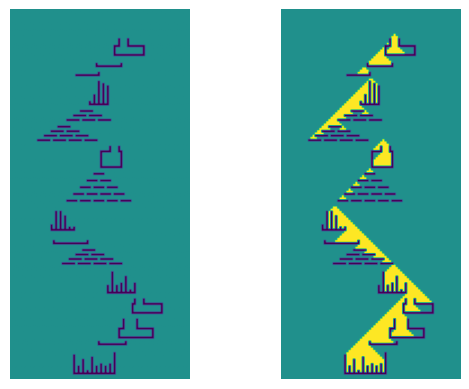

In [6]:
fig, ax = plt.subplots(1, 2)
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[0].imshow(grid[450:530].T, vmax=1)
ax[1].imshow(grid1[450:530].T)


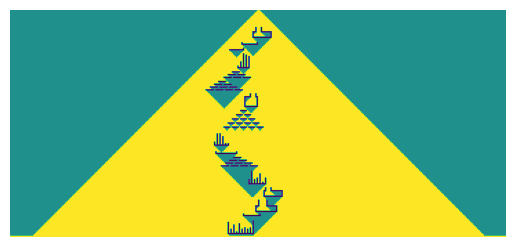

In [7]:
plt.axis('off')
plt.imshow(grid2[320:680].T)